In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import Image
from datetime import timedelta

In [2]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\lramp\Downloads\Case Study Stuart


#### Importing data

In [3]:
# loading the data
assign_driver_table = pd.read_csv("assign_driver_table.csv")
delivery_table = pd.read_csv("delivery_table.csv")
package_table = pd.read_csv("package_table.csv")
pre_order_eta_table = pd.read_csv("pre_order_eta_table.csv")
task_table = pd.read_csv("task_table.csv")

In [4]:
print("Shape assign_driver_table:" , assign_driver_table.shape)
print("Shape delivery_table:" , delivery_table.shape)
print("Shape package_table:" , package_table.shape)
print("Shape pre_order_eta_table:" , pre_order_eta_table.shape)
print("Shape task_table:" , task_table.shape)

Shape assign_driver_table: (449997, 7)
Shape delivery_table: (449997, 6)
Shape package_table: (449997, 7)
Shape pre_order_eta_table: (2912253, 4)
Shape task_table: (899994, 6)


### Mapping tables

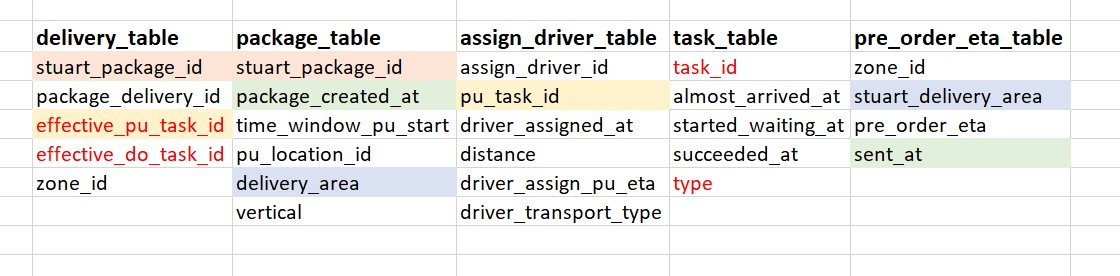

In [5]:
Image(filename='Pic Overall.jpg',width="750")

### Step 1: Merging tables delivery_table, package_table, assign_driver_table.

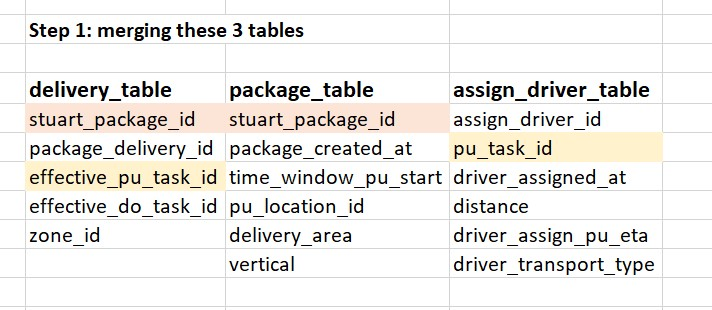

In [6]:
Image(filename='Pic Step1.jpg',width="450")

In [7]:
# renaming col 'pu_task_id' before merging with T1
assign_driver_table = assign_driver_table.rename(columns={'pu_task_id': 'effective_pu_task_id'})
assign_driver_table.columns

Index(['Unnamed: 0', 'assign_driver_id', 'effective_pu_task_id',
       'driver_assigned_at', 'distance', 'driver_assign_pu_eta',
       'driver_transport_type'],
      dtype='object')

In [8]:
# merging Delivery and Package tables
T1 = delivery_table.merge(package_table, on='stuart_package_id', suffixes=('_del', '_pack')) \
                    .merge(assign_driver_table, on='effective_pu_task_id')

print("Shape T1:" , T1.shape)

# dropping some empty columns
T1.drop(['Unnamed: 0_del','Unnamed: 0_pack','Unnamed: 0'], axis=1, inplace=True)
print("Shape T1:" , T1.shape)
T1.head()

Shape T1: (449997, 18)
Shape T1: (449997, 15)


,stuart_package_id,package_delivery_id,effective_pu_task_id,effective_do_task_id,zone_id,package_created_at,time_window_pu_start,pu_location_id,delivery_area,vertical,assign_driver_id,driver_assigned_at,distance,driver_assign_pu_eta,driver_transport_type
0,127885574,62762532,167278884,167278885,29,2021-02-04 17:48:21.000000,2021-02-04 17:53:19.000000,1480922,Bury,RETAIL,83857063,2021-02-04 17:48:29.622000,217.76271,2021-02-04 17:53:18.740000,car
1,127425999,62306455,166252382,166252383,53,2021-02-01 11:47:10.000000,2021-02-01 11:50:08.000000,452665,WestBromwich,GROCERY,82345404,2021-02-01 11:48:50.372000,1374.75740,2021-02-01 11:56:06.399000,car
2,128113531,63002565,167803802,167803803,27,2021-02-05 21:30:59.000000,2021-02-05 21:33:58.000000,610533,BristolCentral,RETAIL,84590062,2021-02-05 21:31:30.175000,453.61380,2021-02-05 21:33:57.024000,car
3,127630783,62490875,166713622,166713624,14,2021-02-02 19:14:30.000000,2021-02-02 19:17:28.000000,528553,Middlesbrough,RETAIL,83002234,2021-02-02 19:14:41.527000,81.89639,2021-02-02 19:17:27.933000,car
4,129058251,64039545,169986804,169986805,53,2021-02-12 13:32:20.000000,2021-02-12 13:42:19.000000,2016256,WolverhamptonWednesfield,ECOMMERCE,87859052,2021-02-12 13:54:19.945000,1833.09780,2021-02-12 13:57:16.741000,car


In [9]:
T1.columns

Index(['stuart_package_id', 'package_delivery_id', 'effective_pu_task_id',
       'effective_do_task_id', 'zone_id', 'package_created_at',
       'time_window_pu_start', 'pu_location_id', 'delivery_area', 'vertical',
       'assign_driver_id', 'driver_assigned_at', 'distance',
       'driver_assign_pu_eta', 'driver_transport_type'],
      dtype='object')

In [10]:
# exporting as CSV
T1.to_csv('T1.csv')

### Step 2: Merging tables T1 & task_table

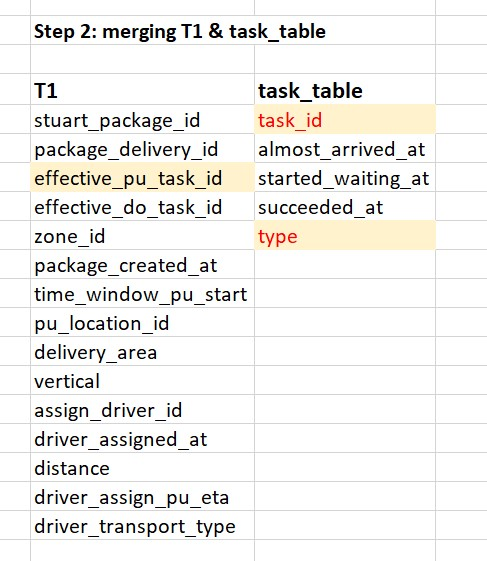

In [11]:
Image(filename='Pic Step2.jpg',width="350")

In [12]:
# splitting task_table between Pickup and Dropoff
pu_task_table = task_table[task_table['type']== 'PICKUP']
do_task_table = task_table[task_table['type']== 'DROPOFF']

print("Shape pu_task_table:" , pu_task_table.shape)
print("Shape do_task_table:" , do_task_table.shape)

Shape pu_task_table: (449997, 6)
Shape do_task_table: (449997, 6)


In [13]:
# renaming some columns to fit the other table before merging
pu_task_table = pu_task_table.rename(columns={'task_id': 'effective_pu_task_id'})
do_task_table = do_task_table.rename(columns={'task_id': 'effective_do_task_id'})
pu_task_table.columns

Index(['Unnamed: 0', 'effective_pu_task_id', 'almost_arrived_at',
       'started_waiting_at', 'succeeded_at', 'type'],
      dtype='object')

In [14]:
# merging T1 and Pickup/Dropoff tables
T2 = T1.merge(pu_task_table, on='effective_pu_task_id') \
                    .merge(do_task_table, on='effective_do_task_id', suffixes=('_pu', '_do'))

# dropping some empty and not needed columns
T2.drop(['Unnamed: 0_pu','Unnamed: 0_do','type_pu', 'type_do'], axis=1, inplace=True)

# from suffix to prefix
T2 = T2.rename(columns={'almost_arrived_at_pu': 'pu_almost_arrived_at', 'started_waiting_at_pu': 'pu_started_waiting_at'
                        , 'succeeded_at_pu': 'pu_succeeded_at', 'almost_arrived_at_do': 'do_almost_arrived_at'
                        , 'started_waiting_at_do': 'do_started_waiting_at', 'succeeded_at_do': 'do_succeeded_at'})

print("Shape T2:" , T2.shape)

Shape T2: (449997, 21)


In [15]:
T2.columns

Index(['stuart_package_id', 'package_delivery_id', 'effective_pu_task_id',
       'effective_do_task_id', 'zone_id', 'package_created_at',
       'time_window_pu_start', 'pu_location_id', 'delivery_area', 'vertical',
       'assign_driver_id', 'driver_assigned_at', 'distance',
       'driver_assign_pu_eta', 'driver_transport_type', 'pu_almost_arrived_at',
       'pu_started_waiting_at', 'pu_succeeded_at', 'do_almost_arrived_at',
       'do_started_waiting_at', 'do_succeeded_at'],
      dtype='object')

In [16]:
# exporting as CSV
T2.to_csv('T2.csv')

### Step 3: Merging tables T2 & pre_order_eta_table

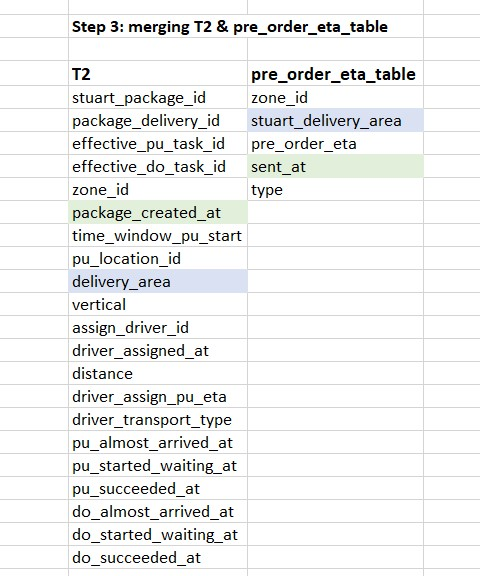

In [17]:
Image(filename='Pic Step3.jpg',width="400")

In [18]:
# reloading data
T1 = pd.read_csv("T2.csv")
T2 = pd.read_csv("pre_order_eta_table.csv")

print('T1 shape: ', T1.shape)
print('T2 shape: ', T2.shape)

# renaming some columns to prepare the merge
T1 = T1.rename(columns={'package_created_at': 'time'})
T2 = T2.rename(columns={'sent_at': 'time', 'stuart_delivery_area': 'delivery_area'})

T1 shape:  (449997, 22)
T2 shape:  (2912253, 4)


#### Using merge_asof to perform a left join on the nearest backward pre-order ETA time key

In [19]:
# sorting values, needed for merge_asof
T1.sort_values("time", inplace=True)
T2.sort_values("time", inplace=True)

# putting same data type for time
T1.time = pd.to_datetime(T1.time)
T2.time = pd.to_datetime(T2.time)

# Mergins using merge_asof to get the last backward time for each delivery_area
T3 = pd.merge_asof(T1, T2, on='time', by='delivery_area', direction = 'backward')

In [20]:
# renaming some columns
T3 = T3.rename(columns={'time': 'pre_order_eta', 'zone_id_x': 'zone_id', 'time': 'package_created_at'})

# reordering columns to get them in the same order as the table constructed_data 
T3 = T3[['stuart_package_id','package_created_at','time_window_pu_start','vertical','distance','driver_assigned_at'
         ,'driver_assign_pu_eta','driver_transport_type','pu_almost_arrived_at','pu_started_waiting_at'
         ,'pu_succeeded_at','do_almost_arrived_at','do_started_waiting_at','do_succeeded_at'
         ,'delivery_area','zone_id','pre_order_eta']]

print('T3 shape: ', T3.shape)
T3.head()

T3 shape:  (449997, 17)


,stuart_package_id,package_created_at,time_window_pu_start,vertical,distance,driver_assigned_at,driver_assign_pu_eta,driver_transport_type,pu_almost_arrived_at,pu_started_waiting_at,pu_succeeded_at,do_almost_arrived_at,do_started_waiting_at,do_succeeded_at,delivery_area,zone_id,pre_order_eta
0,127399796,2021-02-01 07:00:03,2021-02-01 07:15:00.000000,GROCERY,773.789900,2021-02-01 07:07:44.963000,2021-02-01 07:14:59.792000,bike,2021-02-01 07:19:49.000000,NaN,2021-02-01 07:20:36.000000,2021-02-01 07:23:26.000000,NaN,2021-02-01 07:23:52.000000,Epsom,2,600
1,127399825,2021-02-01 07:00:06,2021-02-01 07:01:04.000000,PROFESSIONAL SERVICES,413.738770,2021-02-01 07:48:45.182000,2021-02-01 07:51:02.776000,bike,2021-02-01 07:50:26.000000,NaN,2021-02-01 07:51:25.000000,2021-02-01 07:58:56.000000,2021-02-01 08:01:33.000000,2021-02-01 08:03:46.000000,BethnalGreen,2,600
2,127399826,2021-02-01 07:00:07,2021-02-01 07:01:05.000000,FOOD,43.365788,2021-02-01 07:00:11.130000,2021-02-01 07:01:04.434000,car,2021-02-01 07:00:23.000000,2021-02-01 07:02:56.000000,2021-02-01 07:13:35.000000,2021-02-01 07:19:10.000000,NaN,2021-02-01 07:20:32.000000,NottinghamBulwell,71,600
3,127399827,2021-02-01 07:00:07,2021-02-01 07:05:00.000000,GROCERY,1248.075800,2021-02-01 07:00:10.537000,2021-02-01 07:04:59.399000,car,2021-02-01 07:04:03.000000,2021-02-01 07:07:11.000000,2021-02-01 07:08:32.000000,2021-02-01 07:11:07.000000,NaN,2021-02-01 07:11:21.000000,RotherhamEastwood,20,600
4,127399830,2021-02-01 07:00:08,2021-02-01 07:05:00.000000,RETAIL,2038.688800,2021-02-01 07:00:10.580000,2021-02-01 07:04:59.399000,car,2021-02-01 07:05:22.000000,2021-02-01 07:07:57.000000,2021-02-01 07:11:25.000000,2021-02-01 07:16:41.000000,NaN,2021-02-01 07:17:40.000000,ManchesterWythenshawe,29,600


In [21]:
# Exporting as CSV
T3.to_csv('T3.csv')

### Data manipulation /Feature engineering

In [22]:
T4 = pd.read_csv("T3.csv")

In [23]:
# Columns with missing values
nulls = np.sum(T4.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = T4.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values.")
print("Shape T4: ", T4.shape)

                            0       1
do_started_waiting_at  352015  object
pu_started_waiting_at   78152  object
do_almost_arrived_at    14155  object
pu_almost_arrived_at     4542  object
There are 4 columns with missing values.
Shape T4:  (449997, 18)


In [24]:
# Because the case study is about POETA, let's drop some non-needed columns with too many NAs.
T4.drop(['do_almost_arrived_at', 'Unnamed: 0'], axis=1, inplace=True)

#### Selecting only non null rows for pu_started_waiting_at

Because as presented in the image below, values for which pu_started_waiting_at are null and they are evenly spread across vertical, transport_type and do not account for much of the overall dataset.

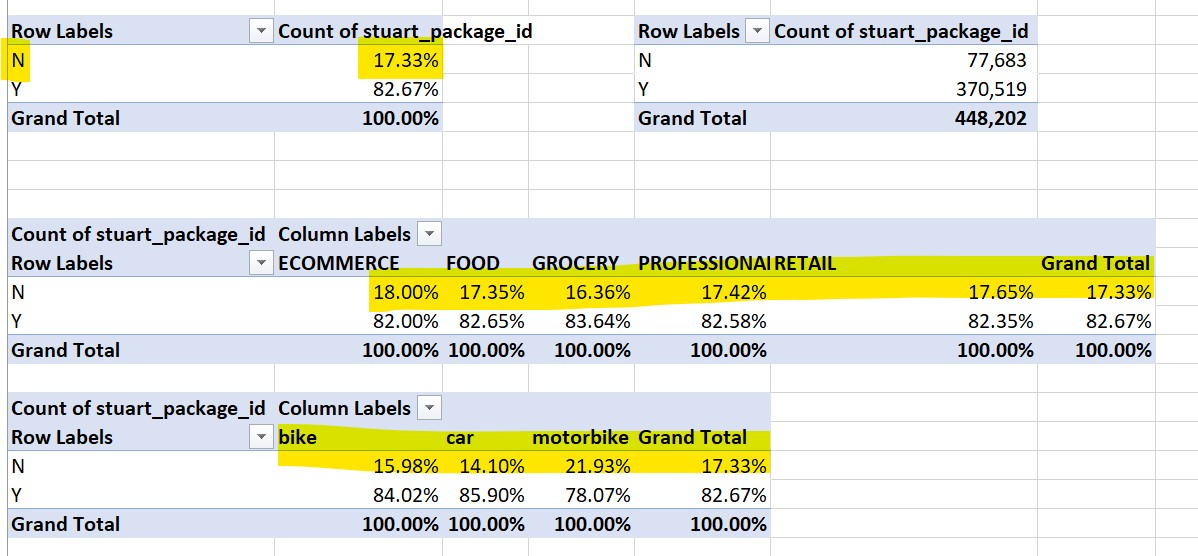

In [25]:
Image(filename='Pic 1.jpg',width="450")

In [26]:
# keeping only rows where pu_started_waiting_at is not null
T4 = T4[T4['pu_started_waiting_at'].notna()]
print("T4 shape: ", T4.shape)

T4 shape:  (371845, 16)


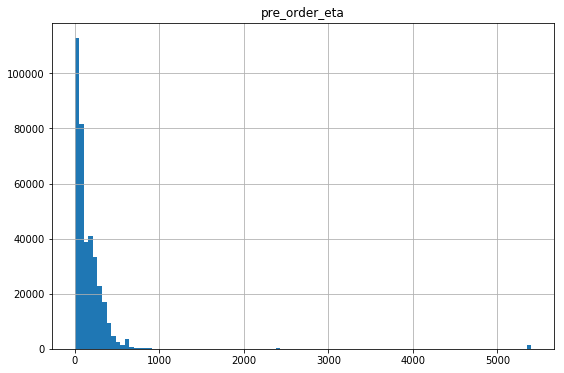

Max pre_order_ETA =  5400


In [27]:
import matplotlib.pyplot as plt
from IPython.display import display

# plotting to get an indea of the distribution for each column
%matplotlib inline
T4[['pre_order_eta']].hist(figsize=(9, 6),  bins=100)
plt.show()

print('Max pre_order_ETA = ', max(T4.pre_order_eta))

#### Assumption: An ETA of 5400s = 1h30. These are either outliers or a bug inputting max ETA. Anyway, this would require a different case study to be solved

In [28]:
# dropping values ETA < 5400
T4 = T4[T4["pre_order_eta"] < 5400]
T4.shape

(370519, 16)

### Choosing 'pu_started_waiting_at' as my PU success event

Because a courier might waiting for the warehouse to be ready so 'pu_succeeded_at' doesn't seem the best choice.

#### Adding new columns

In [29]:
# creating pre_order_eta as seconds
T4['pre_order_eta']  = pd.to_timedelta(T4.pre_order_eta, unit='s')

# creating a time of expected PU using the provided ETA
T4.package_created_at = pd.to_datetime(T4.package_created_at)
T4['POETA_expected_pu_started_waiting_at'] = T4['package_created_at'] + T4['pre_order_eta']

# creating another column: On-time Pickup
T4.pu_started_waiting_at = pd.to_datetime(T4.pu_started_waiting_at)
T4['OnTimePickupWaiting'] = np.where(T4['pu_started_waiting_at'] < T4['POETA_expected_pu_started_waiting_at'], True, False)

In [30]:
# reordering columns to get them in the same order as the table constructed_data 
T4 = T4[['stuart_package_id', 'zone_id', 'delivery_area', 'vertical', 'driver_transport_type', 'distance',
         'package_created_at', 'time_window_pu_start','driver_assigned_at', 'driver_assign_pu_eta', 
         'pu_almost_arrived_at', 'pu_started_waiting_at', 'pu_succeeded_at', 'do_started_waiting_at', 
         'do_succeeded_at', 'pre_order_eta', 'POETA_expected_pu_started_waiting_at', 'OnTimePickupWaiting']]

In [31]:
# creating some PU columns

T4['Pu_late_length'] = np.where((T4['OnTimePickupWaiting'] == False)
                         , (T4['pu_started_waiting_at']-T4['POETA_expected_pu_started_waiting_at']), False)

T4['Pu_late_length_sec'] = T4['Pu_late_length'].dt.total_seconds()
T4['Pu_time_from_PackCreated_to_PuWaiting'] = T4['pu_started_waiting_at']-T4['package_created_at']
T4['Pu_time_from_PackCreated_to_PuWaiting_sec'] = T4['Pu_time_from_PackCreated_to_PuWaiting'].dt.total_seconds()

#T4['PU_Late_below5min'] = np.where((T4['OnTimePickupWaiting'] == False) 
 #                                  & (T4['pu_started_waiting_at'] < (T4['POETA_expected_pu_started_waiting_at'] 
  #                                                                   + timedelta(seconds=300))) , True, False)

In [32]:
# creating some DR columns using driver_assign_pickup_eta

T4.driver_assign_pu_eta = pd.to_datetime(T4.driver_assign_pu_eta)
T4['DR_OnTimePickupWaiting'] = np.where(T4['pu_started_waiting_at'] < T4['driver_assign_pu_eta'], True, False)
T4['DR_Pu_late_length'] = np.where((T4['DR_OnTimePickupWaiting'] == False)
                         , (T4['pu_started_waiting_at']-T4['driver_assign_pu_eta']), False)
T4['DR_Pu_late_length_sec'] = T4['DR_Pu_late_length'].dt.total_seconds()

T4.driver_assigned_at = pd.to_datetime(T4.driver_assigned_at)
T4['DR_Pu_time_from_DRAssign_to_PuWaiting'] = T4['pu_started_waiting_at']-T4['driver_assigned_at']
T4['DR_Pu_time_from_DRAssign_to_PuWaiting_sec'] = T4['DR_Pu_time_from_DRAssign_to_PuWaiting'].dt.total_seconds()

In [33]:
# dropping some empty and not needed columns
T4.drop(['Pu_late_length','Pu_time_from_PackCreated_to_PuWaiting','DR_Pu_late_length'
         , 'DR_Pu_time_from_DRAssign_to_PuWaiting'], axis=1, inplace=True)

# putting back pre_order_eta as sec
T4.pre_order_eta = T4.pre_order_eta.dt.total_seconds()

In [34]:
print('T4 shape: ', T4.shape)
T4.head()

T4 shape:  (370519, 23)


,stuart_package_id,zone_id,delivery_area,vertical,driver_transport_type,distance,package_created_at,time_window_pu_start,driver_assigned_at,driver_assign_pu_eta,...,do_started_waiting_at,do_succeeded_at,pre_order_eta,POETA_expected_pu_started_waiting_at,OnTimePickupWaiting,Pu_late_length_sec,Pu_time_from_PackCreated_to_PuWaiting_sec,DR_OnTimePickupWaiting,DR_Pu_late_length_sec,DR_Pu_time_from_DRAssign_to_PuWaiting_sec
2,127399826,71,NottinghamBulwell,FOOD,car,43.365788,2021-02-01 07:00:07,2021-02-01 07:01:05.000000,2021-02-01 07:00:11.130,2021-02-01 07:01:04.434,...,NaN,2021-02-01 07:20:32.000000,600.0,2021-02-01 07:10:07,True,0.0,169.0,False,111.566,164.870
3,127399827,20,RotherhamEastwood,GROCERY,car,1248.075800,2021-02-01 07:00:07,2021-02-01 07:05:00.000000,2021-02-01 07:00:10.537,2021-02-01 07:04:59.399,...,NaN,2021-02-01 07:11:21.000000,600.0,2021-02-01 07:10:07,True,0.0,424.0,False,131.601,420.463
4,127399830,29,ManchesterWythenshawe,RETAIL,car,2038.688800,2021-02-01 07:00:08,2021-02-01 07:05:00.000000,2021-02-01 07:00:10.580,2021-02-01 07:04:59.399,...,NaN,2021-02-01 07:17:40.000000,600.0,2021-02-01 07:10:08,True,0.0,469.0,False,177.601,466.420
6,127399833,47,ReadingSouth,ECOMMERCE,bike,2747.162600,2021-02-01 07:00:09,2021-02-01 07:01:07.000000,2021-02-01 07:00:18.696,2021-02-01 07:06:01.474,...,2021-02-01 07:21:05.000000,2021-02-01 07:22:42.000000,600.0,2021-02-01 07:10:09,False,113.0,713.0,False,360.526,703.304
7,127399837,47,ReadingCentral,GROCERY,bike,767.565370,2021-02-01 07:00:11,2021-02-01 07:10:00.000000,2021-02-01 07:03:28.722,2021-02-01 07:09:59.474,...,NaN,2021-02-01 07:26:01.000000,600.0,2021-02-01 07:10:11,False,231.0,831.0,False,242.526,633.278


In [35]:
# Exporting as CSV
T4.to_csv('T4.csv')